# 华为手表使用前后睡眠时长可视化

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import pandas as pd

In [6]:
# 设置中文字体属性
font_path = '../data/SimHei.ttf'
font_prop  = fm.FontProperties(fname=font_path, size=16)

In [7]:
#读取华为手表使用前后睡眠时长文件
df = pd.read_excel("../result/华为手表睡眠时长.xlsx")
categories = df["姓名"]
scores_right  = df['华为手表使用前']/60
scores_left = df['华为手表使用后']/60

df  = pd.DataFrame()
df['name'] = categories
df['right'] = scores_left
df['left'] = scores_right

df['change'] = (df['right']-df['left'])
df = df.sort_values(by="change")
categories = df['name']
scores_right = df['right']
scores_left = df['left']

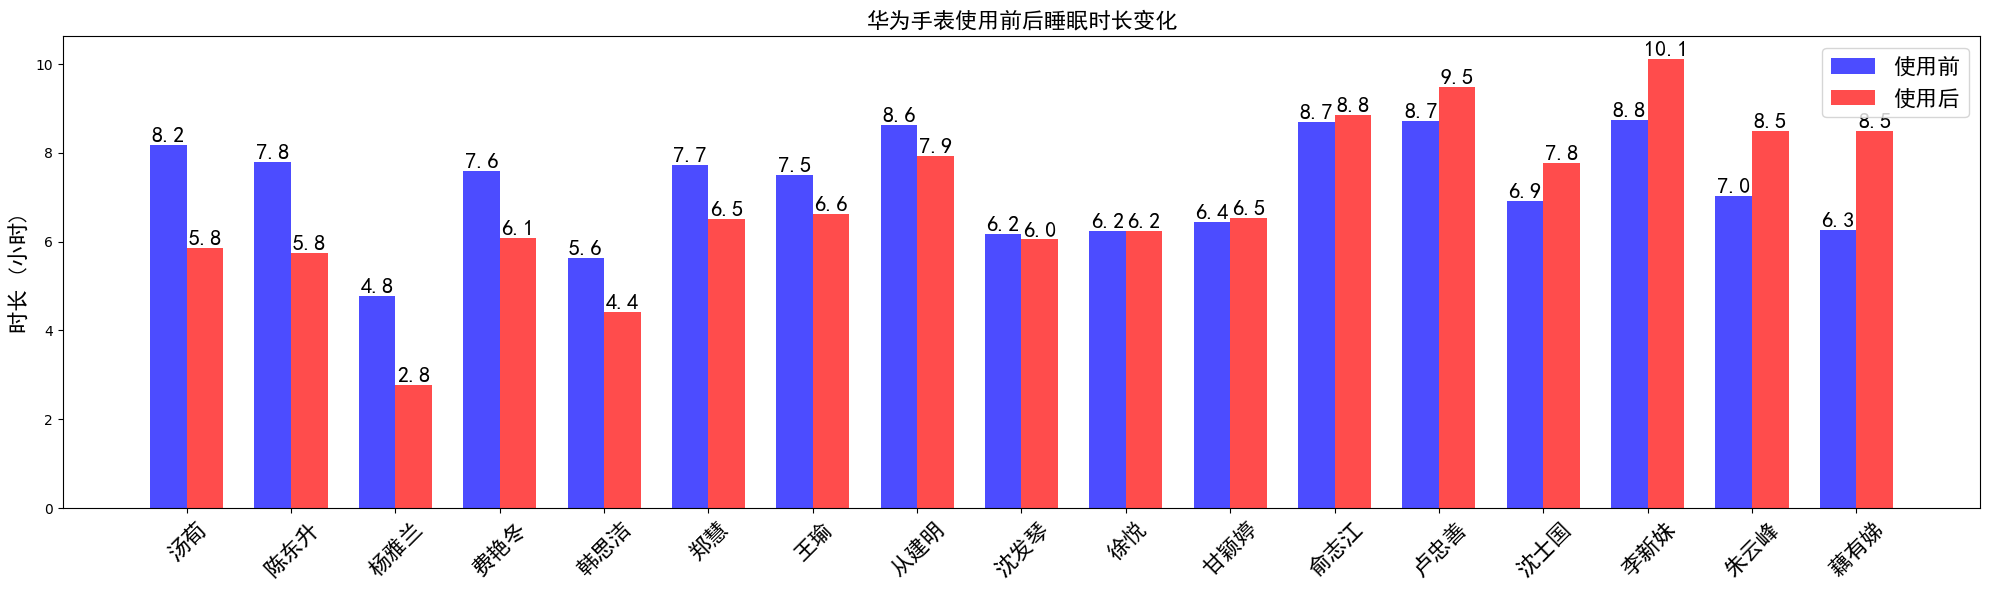

In [8]:
#作图
bar_width = 0.35
index = np.arange(len(categories))
plt.figure(figsize=(20, 6))

bars_left = plt.bar(index, scores_left, bar_width, label='使用前', color='b', alpha=0.7)
bars_right = plt.bar(index + bar_width, scores_right, bar_width, label='使用后', color='r', alpha=0.7)

# 添加标题和标签
plt.xlabel('', fontproperties=font_prop)
plt.ylabel('时长 (小时)', fontproperties=font_prop,fontsize=16)
plt.title('华为手表使用前后睡眠时长变化', fontproperties=font_prop)
plt.xticks(index + bar_width / 2, categories, rotation=45, fontproperties=font_prop)
plt.legend(prop=font_prop)

for bar in bars_left:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontproperties=font_prop)

for bar in bars_right:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig("../result/华为手表使用前后睡眠时长.png")
plt.show()